# Principal Component Analysis

### Principal Component Analysis (PCA) is a dimensionality reduction technique used in machine learning and statistics to reduce the number of variables (or features) in a dataset while retaining as much information as possible. It transforms the original features into a new set of variables called principal components, which are linear combinations of the original features.

## Key Concepts:

### Variance and Covariance:
PCA aims to identify the directions (called principal components) where the data varies the most.
It reduces dimensionality by transforming the original feature space into a new feature space where the variance is maximized in the first few principal components.

### Eigenvalues and Eigenvectors:
PCA works by finding eigenvectors (which are the principal components) and eigenvalues (which indicate the magnitude of the variance captured by the eigenvector).
Eigenvectors are the directions in which data spreads the most.
Eigenvalues represent the variance captured along those directions.

### Transformation of the Data:
Once the eigenvectors are identified, the original data is projected onto these eigenvectors (principal components), resulting in a new set of variables (principal components).

### Dimensionality Reduction:
By selecting only the first few principal components (those with the largest eigenvalues), we can reduce the dataset’s dimensionality while retaining most of the variance (information).

## Steps in PCA:

### Standardize the Data:
PCA is sensitive to the scale of the data, so it’s important to standardize the features (mean = 0, variance = 1) before applying PCA, especially if the features have different units or ranges.

### Compute the Covariance Matrix:
The covariance matrix represents how the features relate to each other. It is used to understand the relationships between the variables.

### Calculate the Eigenvalues and Eigenvectors:
These values represent the directions of maximum variance and the magnitude of variance along those directions.

### Sort the Eigenvalues and Eigenvectors:
Sort the eigenvalues in descending order and choose the top k eigenvectors that correspond to the largest eigenvalues (to retain the most significant variance).

### Form the Principal Components:
The principal components are linear combinations of the original features. We select the top k eigenvectors and project the original data onto these eigenvectors to form the new dataset.

# Import required libraries 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

In [6]:
%matplotlib inline

# Load dataset - Pollution dataset - 9 features 

In [40]:
#df=pd.read_csv('DataSets/1.Regression-WineQuality-11i 1o.csv')
df=pd.read_csv('DataSets/4.Classification-Pollution_dataset-9i & 4or2 o.csv')

In [42]:
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality,Binaary_Class
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate,Good
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate,Good
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate,Good
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good,Good


## LabelEncoder

In [17]:
label_encoder=LabelEncoder()

df['Air Quality']=label_encoder.fit_transform(df['Air Quality'])

In [21]:
df.drop(columns=['Binaary_Class'],axis=1,inplace=True)

In [25]:

X=df.drop(columns=['Air Quality'],axis=1)
y=df['Air Quality']

# Standardize the data (important step)

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA

In [31]:
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio

In [34]:
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.55721851 0.14969909]


# Plotting the 2D projection

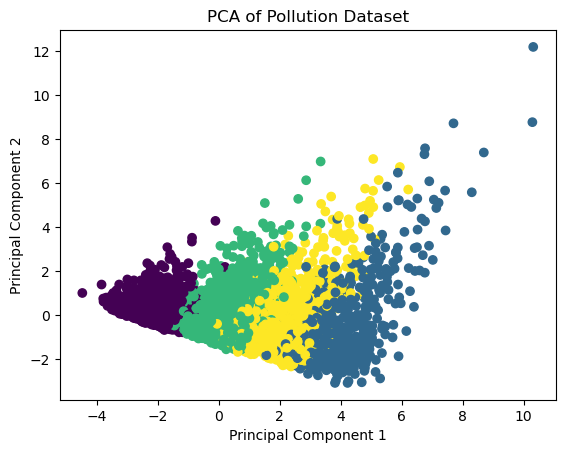

In [47]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Pollution Dataset')
plt.show()